# Описание исследуемого датафрейма

### Описание признаков:

- "id": "Уникальный идентификатор пациента (int64)" - по сути, повторяет индексы, присваеваемые pandas при создании dataframe, не нужен

- "N_Days": "Количество дней наблюдения за пациентом (int64)"

- "Drug": 'Тип препарата: "D-penicillamine" или "Placebo" (object)', преобразован в int: 0 - Placebo, 1 - D-penicillamine

- "Age": "Возраст пациента в днях (int64)"

- "Sex": 'Пол пациента: "M" (мужской), "F" (женский) (object)', преобразован в int: 0 - F, 1 - M

- "Ascites": 'Наличие асцита: "Y" (да), "N" (нет) (object)', преобразован в int: 0 - N, 1 - Y

- "Hepatomegaly": 'Наличие гепатомегалии: "Y" (да), "N" (нет) (object)', преобразован в int: 0 - N, 1 - Y

- "Spiders": 'Наличие звездчатой гемангиомы: "Y" (да), "N" (нет) (object)', преобразован в int: 0 - N, 1 - Y

- "Edema": 'Наличие отёков: "Y" (да), "N" (нет), "S" (лёгкая форма) (object)', преобразован в int: 0 - N, 1 - Y, 2 - S

- "Bilirubin": "Уровень билирубина в сыворотке крови (float64)"

- "Cholesterol": "Уровень холестерина (float64)"

- "Albumin": "Уровень альбумина (float64)"

- "Copper": "Уровень меди в сыворотке крови (float64)"

- "Alk_Phos": "Уровень щелочной фосфатазы (float64)"

- "SGOT": "Уровень аспартатаминотрансферазы (float64)"

- "Tryglicerides": "Уровень триглицеридов (float64)"

- "Platelets": "Количество тромбоцитов (float64)"

- "Prothrombin": "Протромбиновое время (float64)"

- "Stage": "Стадия заболевания (1–4) (float64)", важно понимать, что это следует рассматривать как категориальный признак! Имеет всего 4 значения, соответствующие стадии болезни

- "Status": 'Статус пациента: "C" (жив), "D" (умер), "CL" (жив вследствие трансплантации печени) (object)' Преобразован в int: 0 - D, 1 - C, 2 - CL. Ключевой признак

### Анализ столбцов

Общая информация:
- Пропуски в датафрейме отсутствуют.
- Количество столбцов: 20, количество строк: 7905.
- Столбец "Sex" имеет дисбаланс: 92,8% женщин против 7,2% мужчин.
- Столбец "Ascites" имеет дисбаланс: 95,2% False против 4,8% True.
- Столбец "Edema" имеет дисбаланс: 90,6% False, 4.4% True, 5.0% S (Слабая форма).
- Построены круговые диаграммы для категориальных признаков (см. в "reports").
- Построена корреляционная матрица для числовых признаков (см. в "reports"), корреляционная матрица для всех признаков построена с помощью библиотеки ProfileReport.
- Проведена оценка выбросов по методу IQR, построены "ящики с усами" для числовых признаков, попадаются столбцы с заметным количеством выбросов по методу IQR, например: Bilirubin: 789 выбросов (9.98%), Alk_Phos: 792 выбросов (10.02%) (см. в "reports").
- Проведена оценка числовых признаков на соответствие нормальному распределению (для эффективного применения Z-score требуется, чтобы данные имели нормальное распределение), наиболее близкие к данному типу распределения столбцы: 'Platelets', 'Prothrombin', 'Albumin' (см. графики в "reports") (см. в "reports").
- Проведена оценка выбросов по методу Z-score (по порогу 3), отмечено, что выбросы, полученные данным методом, в несколько раз меньше, например: Bilirubin: 281 выбросов, Alk_Phos: 189 выбросов (см. в "reports"). Таким образом, оценки выбросов, полученные с помощью перечисленных методов, существенно различаются.
- Столбцы типа "object" преобразованы в "int" (датасет лежит тут: data/data_remapped.csv).

### Уровни корреляций

В результате анализа корреляционных матриц установлено отсутствие высокой степени корреляции признаков. Максимальный уровень корреляции признаков — средний, что наблюдается в следующих случаях: 

- Между столбцами "Bilirubin" и "Copper" наблюдается средний уровень корреляции по Пирсону (0,44);
- Между столбцами "Bilirubin" и "SGOT" наблюдается средний уровень корреляции по Пирсону (0,37);
- Между столбцами "Edema" и "Ascites" наблюдается средний уровень корреляции по Крамеру (0,67)

Таким образом, все признаки рекомендуется оставить.


In [3]:
#Открытие файла через относительный путь
import pandas as pd
import numpy as np
from pathlib import Path
current_dir = Path.cwd()
file_path = current_dir.parent / "data" / "raw_data.csv"
train_df = pd.read_csv(file_path)
train_df


,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,D-penicillamine,16839,F,N,N,N,N,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,C
7901,7901,1492,Placebo,17031,F,N,Y,N,N,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,C
7902,7902,1576,D-penicillamine,25873,F,N,N,Y,S,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,D
7903,7903,3584,D-penicillamine,22960,M,N,Y,N,N,0.7,248.0,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0,D


In [4]:
# Первичный анализ данных (библиотека ProfileReport), сохраняется в ту же папку, где лежит notebook
from ydata_profiling import ProfileReport
import pandas as pd

train_df = pd.read_csv('playground-series-s3e26/train.csv')
profile = ProfileReport(train_df,title='ProfileReport')
profile
profile.to_file("мой_отчет.html")

ModuleNotFoundError: No module named 'ydata_profiling'

In [19]:
# Первичный анализ данных 2 (вручную)
print(f"Размер датасета: {train_df.shape}")
print(f"Количество строк: {train_df.shape[0]}")
print(f"Количество столбцов: {train_df.shape[1]}")

Размер датасета: (7905, 20)
Количество строк: 7905
Количество столбцов: 20


In [21]:
print("\nТипы данных:")
print(train_df.dtypes)


Типы данных:
id                 int64
N_Days             int64
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
Status            object
dtype: object


In [23]:
duplicates = train_df.duplicated().sum()
print(f"\nКоличество явных дубликатов: {duplicates}")


Количество явных дубликатов: 0


In [25]:
# Базовая статистика числовых признаков
print("\nБазовая статистика числовых признаков:")
print(train_df.describe())


Базовая статистика числовых признаков:
                id       N_Days           Age    Bilirubin  Cholesterol  \
count  7905.000000  7905.000000   7905.000000  7905.000000  7905.000000   
mean   3952.000000  2030.173308  18373.146490     2.594485   350.561923   
std    2282.121272  1094.233744   3679.958739     3.812960   195.379344   
min       0.000000    41.000000   9598.000000     0.300000   120.000000   
25%    1976.000000  1230.000000  15574.000000     0.700000   248.000000   
50%    3952.000000  1831.000000  18713.000000     1.100000   298.000000   
75%    5928.000000  2689.000000  20684.000000     3.000000   390.000000   
max    7904.000000  4795.000000  28650.000000    28.000000  1775.000000   

           Albumin       Copper      Alk_Phos         SGOT  Tryglicerides  \
count  7905.000000  7905.000000   7905.000000  7905.000000    7905.000000   
mean      3.548323    83.902846   1816.745250   114.604602     115.340164   
std       0.346171    75.899266   1903.750657    48.7

In [27]:
# Поиск пропущенных значений
print("Пропущенные значения")
missing_values = train_df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
if missing_values.empty:
    print("Пропущенные значения отсутствуют.")
else:
    print(missing_values)

Пропущенные значения
Пропущенные значения отсутствуют.


In [29]:
# Строим круговые диаграммы для категориальных признаков
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
df = train_df  

# Столбцы типа object
object_columns = df.select_dtypes(include=['object']).columns

for column in object_columns:
    value_counts = df[column].value_counts()
    
    print(f"Столбец: {column}")
    print(f"Уникальные значения: {list(value_counts.index)}")
    
    # Создаем круговую диаграмму
    plt.figure(figsize=(8, 6))
    
    if len(value_counts) == 2:
        colors = ['#FF6B6B', '#4ECDC4'] 
    else:
        colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']  
    
    wedges, texts, autotexts = plt.pie(
        value_counts.values, 
        labels=value_counts.index, 
        autopct='%1.1f%%',
        startangle=90,
        colors=colors
    )
    
    
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(12)
    
    plt.title(f'Распределение значений: {column}', fontsize=14)
    plt.axis('equal')

    
    base_filename = f"{column}_distribution.png"
    plt.savefig(f"{base_filename}.png", dpi=300, bbox_inches='tight')
    plt.close()  
    print("-" * 50)


Столбец: Drug
Уникальные значения: ['Placebo', 'D-penicillamine']
--------------------------------------------------
Столбец: Sex
Уникальные значения: ['F', 'M']
--------------------------------------------------
Столбец: Ascites
Уникальные значения: ['N', 'Y']
--------------------------------------------------
Столбец: Hepatomegaly
Уникальные значения: ['Y', 'N']
--------------------------------------------------
Столбец: Spiders
Уникальные значения: ['N', 'Y']
--------------------------------------------------
Столбец: Edema
Уникальные значения: ['N', 'S', 'Y']
--------------------------------------------------
Столбец: Status
Уникальные значения: ['C', 'D', 'CL']
--------------------------------------------------


In [30]:
# Детальный анализ по числовым признакам методом межквартильного размаха (IQR)

key_columns = ['Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 
              'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

print("\nДетальный анализ выбросов в ключевых признаках:")
for col in key_columns:
    if col in train_df.columns:
        Q1 = train_df[col].quantile(0.25)
        Q3 = train_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = detect_outliers_iqr(train_df[col])
        print(f"\n{col}:")
        print(f"  Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
        print(f"  Границы: [{lower_bound:.2f}, {upper_bound:.2f}]")
        print(f"  Выбросов: {len(outliers)} ({len(outliers)/len(train_df)*100:.1f}%)")
        if len(outliers) > 0:
            print(f"  Min выброс: {outliers.min():.2f}, Max выброс: {outliers.max():.2f}")

        else:
            print(f"\n Признак '{col}' отсутствует в датасете!")


Детальный анализ выбросов в ключевых признаках:


NameError: name 'detect_outliers_iqr' is not defined

Числовые колонки:
['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']


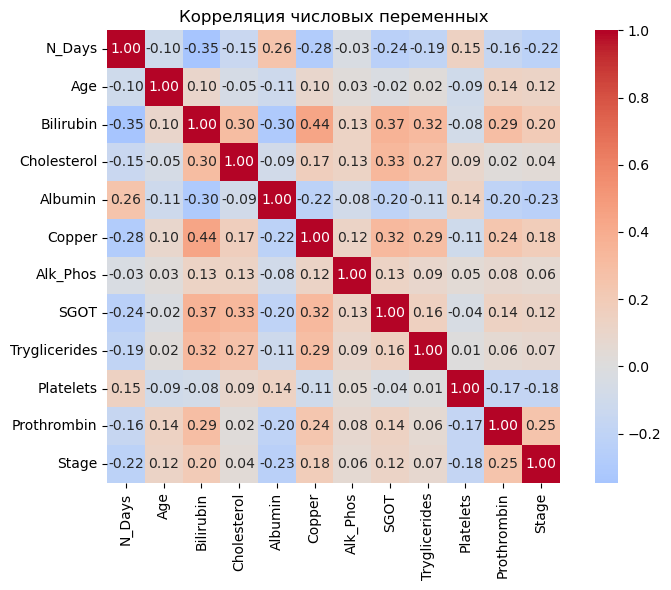

In [38]:
# Строим корреляционную матрицу по Пирсону (все признаки см. в Report.html)
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib

import matplotlib.pyplot as plt
import seaborn as sns
numeric_df = train_df.select_dtypes(include=[np.number])
numeric_df = numeric_df.drop(['id'],axis = 1)
print("Числовые колонки:")
print(numeric_df.columns.tolist())

corr_matrix = numeric_df.corr()

# Визуализируем
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0, 
            fmt='.2f',
            square=True)
plt.title('Корреляция числовых переменных')
plt.tight_layout()


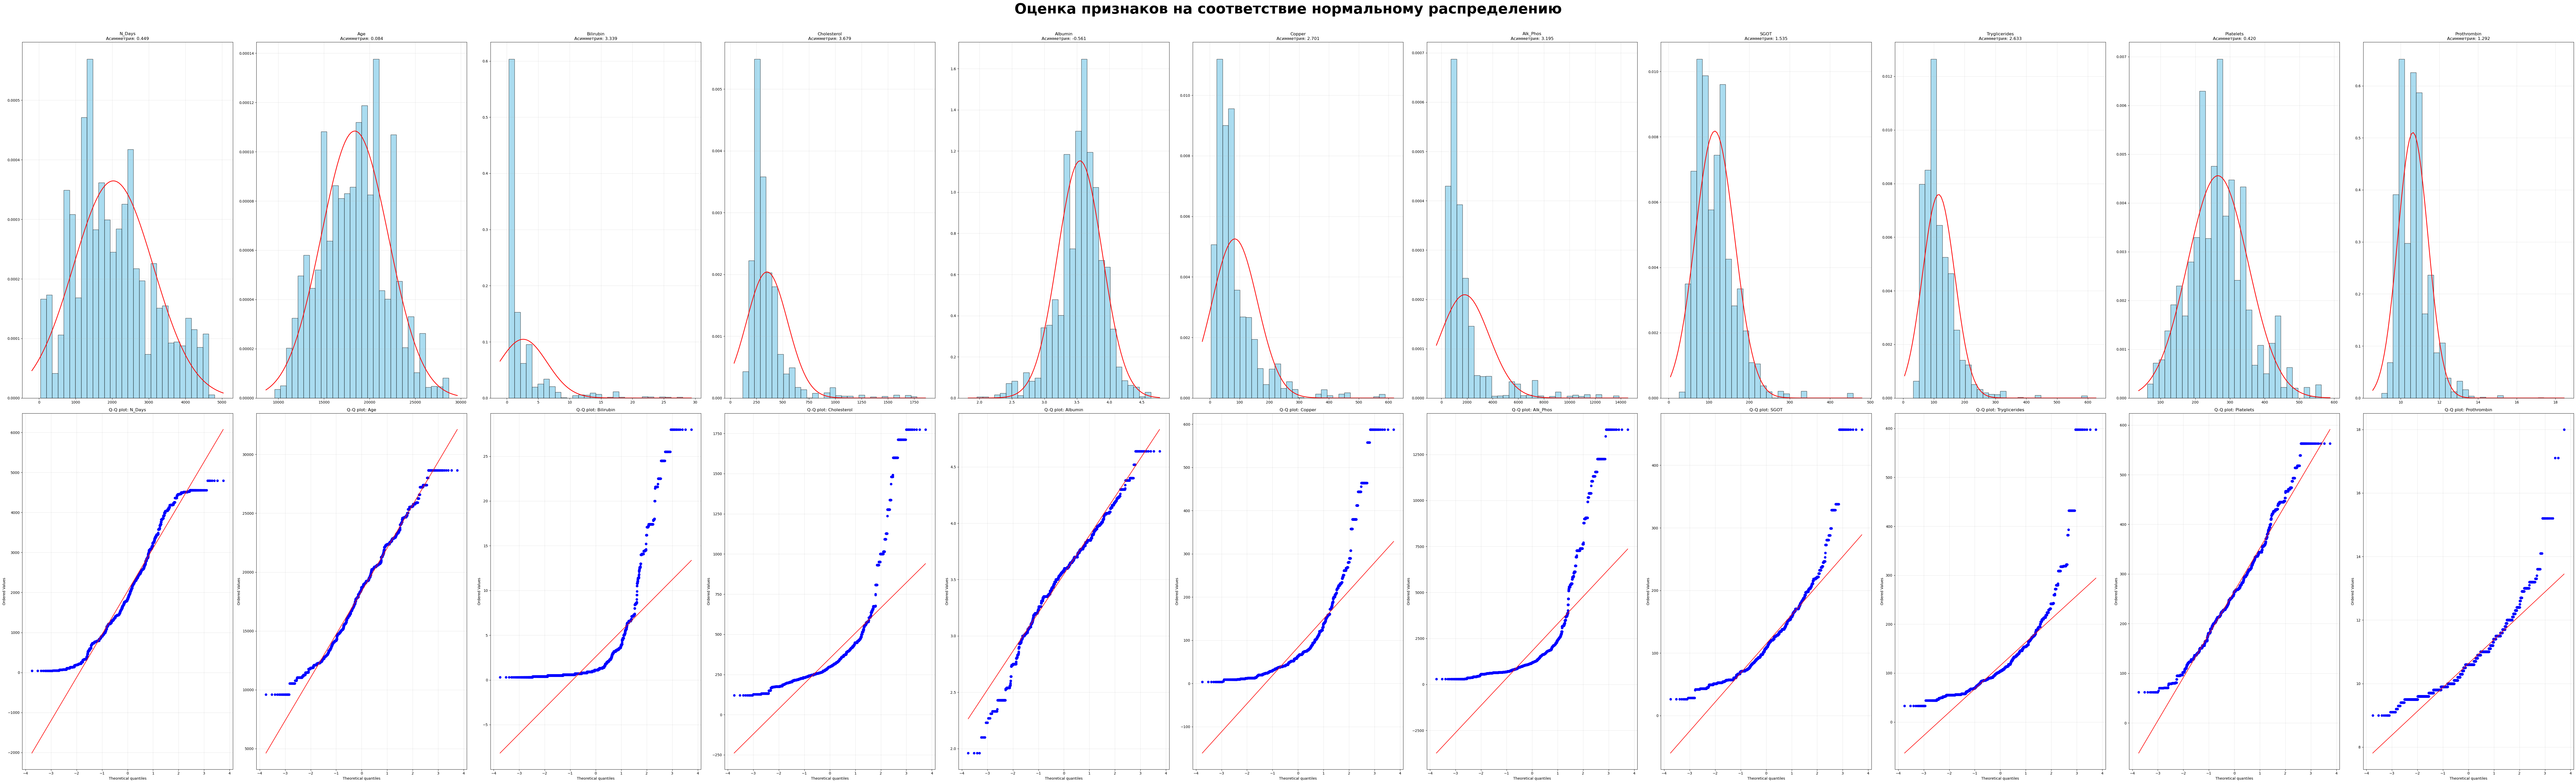

In [40]:
# Оценка соответствия столбцов нормальному распределению
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns



def visualize_normality_multiple_columns(df, columns=None, figsize=(15, 40)):
    """
    Визуализация проверки нормальности для нескольких столбцов
    """
    if columns is None:
        columns = df.select_dtypes(include=[np.number]).columns
    
    n_cols = len(columns)
    n_rows = 2  # гистограмма и Q-Q plot для каждого столбца
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    
    # Если только один столбец, преобразуем axes в 2D массив
    if n_cols == 1:
        axes = axes.reshape(-1, 1)
    
    for i, column in enumerate(columns):
        data = df[column].dropna()
        
        # Гистограмма с нормальной кривой
        axes[0, i].hist(data, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')
        
        # Нормальное распределение
        xmin, xmax = axes[0, i].get_xlim()
        x = np.linspace(xmin, xmax, 100)
        p = stats.norm.pdf(x, data.mean(), data.std())
        axes[0, i].plot(x, p, 'r-', linewidth=2)
        axes[0, i].set_title(f'{column}\nАсимметрия: {stats.skew(data):.3f}')
        axes[0, i].grid(True, alpha=0.3)
        
        # Q-Q plot
        stats.probplot(data, dist="norm", plot=axes[1, i])
        axes[1, i].set_title(f'Q-Q plot: {column}')
        axes[1, i].grid(True, alpha=0.3)
    
    plt.suptitle("Оценка признаков на соответствие нормальному распределению", 
             fontsize=40, fontweight='bold', y=1.01)
    plt.tight_layout()
    plt.show()

# Пример использования

numeric_df = train_df.select_dtypes(include=[np.number])
numeric_df = numeric_df.drop(['id'],axis = 1)
numeric_df = numeric_df.drop(['Stage'],axis = 1)
results = visualize_normality_multiple_columns(numeric_df, columns=None, figsize=(100, 30))

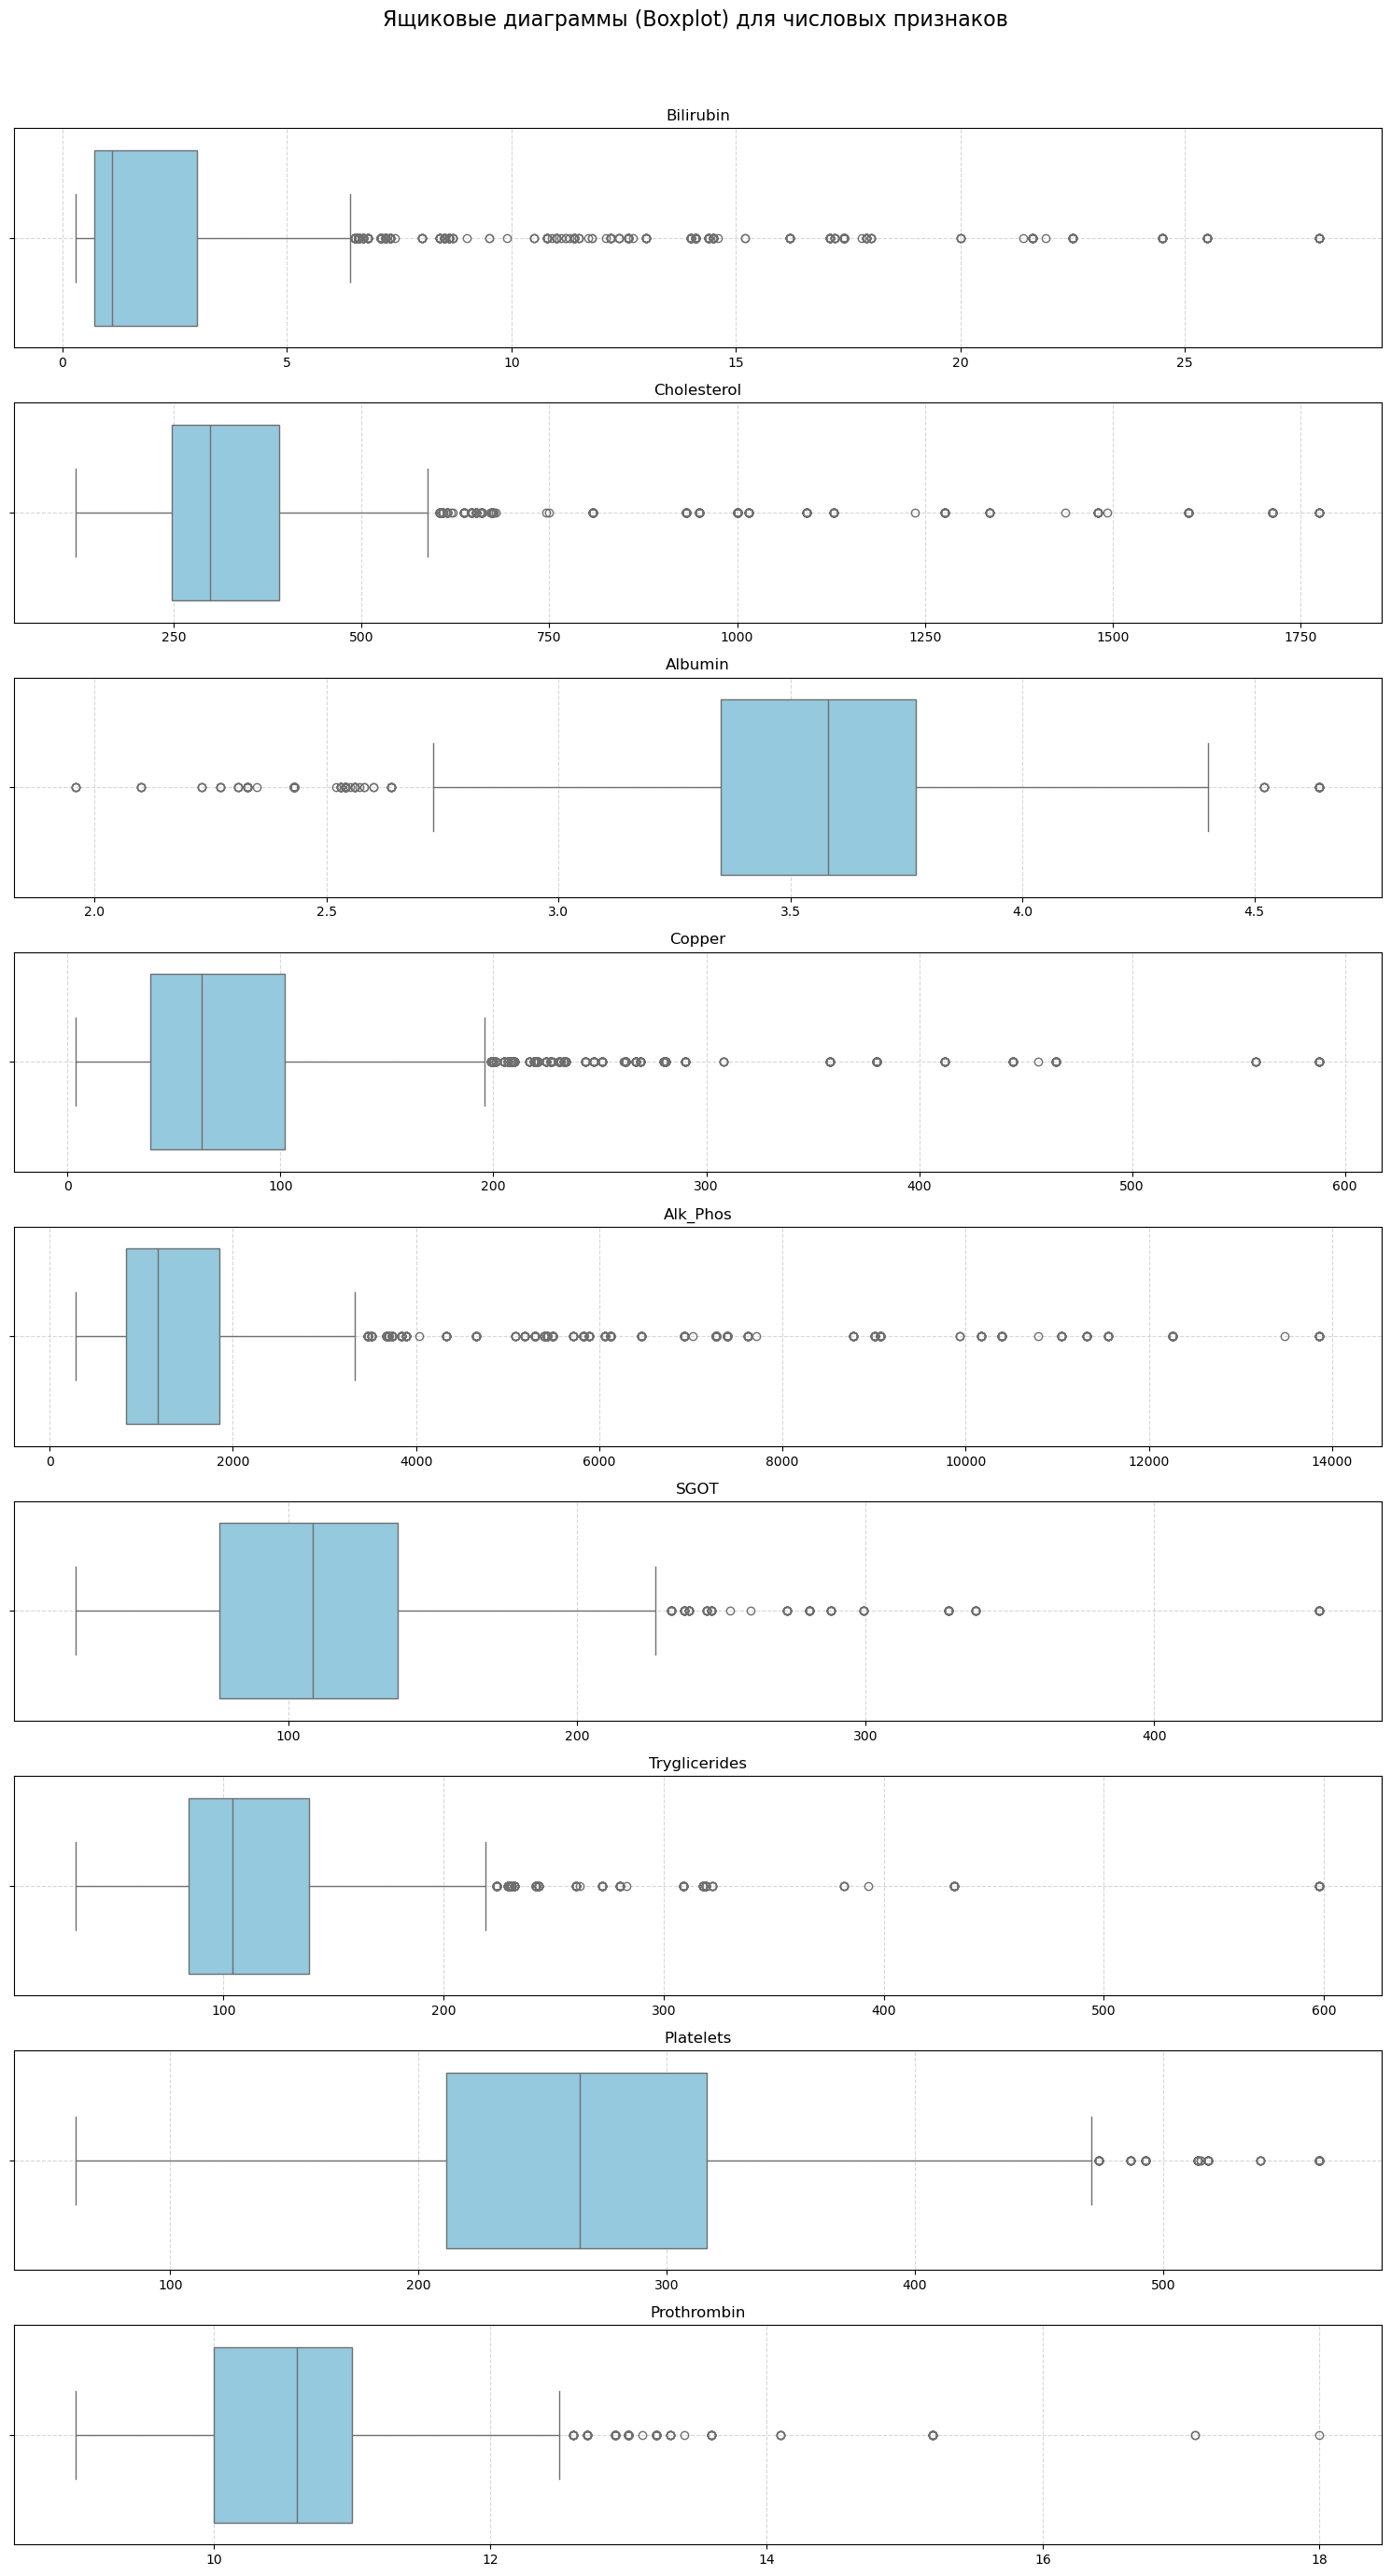

In [41]:
# Графическое отображение выбросов по IQR
numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = numeric_cols.drop(['id','N_Days','Age','Stage'])
# Настройки отображения
plt.figure(figsize=(15, len(numeric_cols) * 3 ))
plt.suptitle("Ящиковые диаграммы (Boxplot) для числовых признаков", fontsize=16, y=1.02)

# Строим графики для каждого признака
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(data=train_df, x=col, color='skyblue')
    plt.title(f"{col}", fontsize=12)
    plt.xlabel("")
    plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

In [42]:
# Z-score метод для обнаружения выбросов

from scipy import stats

def detect_outliers_zscore(column, threshold=3):
    """
    Обнаружение выбросов методом Z-score с возвратом ИНДЕКСОВ
    """
    # Удаляем NaN и сохраняем исходные индексы
    non_null_data = column.dropna()
    
    if len(non_null_data) < 2:  # нужно минимум 2 точки для Z-score
        return set()
    
    # Вычисляем Z-score
    z_scores = np.abs(stats.zscore(non_null_data))
    
    # Находим ИНДЕКСЫ выбросов
    outlier_indices = non_null_data.index[z_scores > threshold]
    
    return set(outlier_indices)

print("\nАнализ выбросов (Z-score метод):")
for col in key_columns:
    if col in train_df.columns:
        outliers_z = detect_outliers_zscore(train_df[col])
        print(f"{col}: {len(outliers_z)} выбросов (Z-score > 3)")



Анализ выбросов (Z-score метод):
Bilirubin: 281 выбросов (Z-score > 3)
Cholesterol: 216 выбросов (Z-score > 3)
Albumin: 106 выбросов (Z-score > 3)
Copper: 151 выбросов (Z-score > 3)
Alk_Phos: 189 выбросов (Z-score > 3)
SGOT: 80 выбросов (Z-score > 3)
Tryglicerides: 113 выбросов (Z-score > 3)
Platelets: 41 выбросов (Z-score > 3)
Prothrombin: 113 выбросов (Z-score > 3)


In [43]:
# тестовое удаление выбросов в столбцах, содержащих данные, приближенные к нормальному распределению
columns_to_remove_outliers = ['Platelets', 'Prothrombin', 'Albumin'] 

print("Анализ выбросов только для выбранных столбцов:")
outlier_indices_all = set()

for col in columns_to_remove_outliers:
    if col in train_df.columns:
        outlier_indices = detect_outliers_zscore(train_df[col])
        outlier_indices_all.update(outlier_indices)
        
        print(f"{col}: {len(outlier_indices)} выбросов")

train_df_clean = train_df.drop(index=outlier_indices_all)

print(f"\nУдалено строк по выбранным столбцам: {len(outlier_indices_all)}")
print(f"Исходный размер: {train_df.shape}")
print(f"Очищенный размер: {train_df_clean.shape}")

Анализ выбросов только для выбранных столбцов:
Platelets: 41 выбросов
Prothrombin: 113 выбросов
Albumin: 106 выбросов

Удалено строк по выбранным столбцам: 255
Исходный размер: (7905, 20)
Очищенный размер: (7650, 20)


In [44]:
#Перекодирование признаков 
from pathlib import Path
current_dir = Path.cwd()
file_path = current_dir.parent / "data" / "data_remapped.csv"
train_df['Drug_encoded'] = train_df['Drug'].map({'Placebo': 0, 'D-penicillamine': 1})
train_df['Sex_encoded'] = train_df['Sex'].map({'F': 0, 'M': 1})
train_df['Ascites_encoded'] = train_df['Ascites'].map({'N': 0, 'Y' : 1})
train_df['Hepatomegaly_encoded'] = train_df['Hepatomegaly'].map({'N': 0, 'Y' : 1})
train_df['Spiders_encoded'] = train_df['Spiders'].map({'N': 0, 'Y' : 1})
train_df['Edema_encoded'] = train_df['Edema'].map({'N': 0, 'S': 2,'Y' : 1})
train_df['Status_encoded'] = train_df['Status'].map({'D': 0, 'C' : 1,'CL' : 2})

train_df_en = train_df.drop(['id','Sex','Drug','Edema','Ascites','Hepatomegaly','Spiders','Status'],axis = 1)

train_df_en.to_csv(file_path)
train_df_en

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Drug_encoded,Sex_encoded,Ascites_encoded,Hepatomegaly_encoded,Spiders_encoded,Edema_encoded,Status_encoded
0,999,21532,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,1,1,0,0,0,0,0
1,2574,19237,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,0,0,0,0,0,0,1
2,3428,13727,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,0,0,0,1,1,1,0
3,2576,18460,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,0,0,0,0,0,0,1
4,788,16658,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,1166,16839,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,1,0,0,0,0,0,1
7901,1492,17031,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,0,0,0,1,0,0,1
7902,1576,25873,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,1,0,0,0,1,2,0
7903,3584,22960,0.7,248.0,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0,1,1,0,1,0,0,0


In [53]:
#расчет корреляции 2 категориальных  признаков по Краймеру
import researchpy as rp
data_for_corr = train_df_en[['Ascites_encoded','Edema_encoded']]
testo = rp.crosstab(train_df_en['Ascites_encoded'],train_df_en['Edema_encoded'], test='chi-square')

testo

C:\Users\Home\anaconda3\Lib\site-packages\researchpy\crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Pearson Chi-square ( 2.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = f"Pearson Chi-square ({dof: .1f}) = "


(                Edema_encoded                
 Edema_encoded               0    1    2   All
 Ascites_encoded                              
 0                        7077  101  347  7525
 1                          84  244   52   380
 All                      7161  345  399  7905,
                 Chi-square test    results
 0  Pearson Chi-square ( 2.0) =   3541.5942
 1                    p-value =      0.0000
 2                 Cramer's V =      0.6693)

### Создание новых признаков (Feature Engineering)

После проведенного анализа данных и выявления средней корреляции между некоторыми признаками было решено создать новые признаки для обучения модели.

In [57]:
# Библиотеки
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [58]:
# Пока работаем с копией обработанного датасета
data = train_df_en.copy()

# Выделим валидационную выборку из тренировочной во избежание утечки данных на кросс-валидации
y = data['Status_encoded']
X = data.drop('Status_encoded', axis=1).reset_index(drop=True)

X_train, X_val, y_train, y_val = train_test_split(
     X, y, test_size=0.2, random_state=42, stratify=y)

### Взаимодействие признаков (features interaction)

In [60]:
# Индекс холестаза
X_train['Bilirubin_Copper'] = X_train['Bilirubin'] * X_train['Copper']

# Индекс разрушения гепатоцита
X_train['Bilirubin_SGOT'] = X_train['Bilirubin'] * X_train['SGOT']

# Функции печени
X_train['Bilirubin_Albumin'] = X_train['Bilirubin'] / X_train['Albumin']
X_train['Alk_Phos_SGOT'] = X_train['SGOT'] / X_train['Alk_Phos']
# MELD = билирубин + INR + альбумин (без креатинина)
X_train['MELD'] = X_train['Bilirubin'] + ((X_train['Prothrombin'] / 12.5)**1.2) + X_train['Albumin']

# Маркер синтетической функции
X_train['Albumin_Prothrombin'] = X_train['Albumin'] * X_train['Prothrombin']

# Липиды
X_train['Cholesterol_Triglycerides'] = X_train['Cholesterol'] / X_train['Tryglicerides']

# Тромбоциты
X_train['Prothrombin_Platelets'] = X_train['Prothrombin'] * X_train['Platelets']

In [61]:
X_train.columns

Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Drug_encoded', 'Sex_encoded', 'Ascites_encoded',
       'Hepatomegaly_encoded', 'Spiders_encoded', 'Edema_encoded',
       'Bilirubin_Copper', 'Bilirubin_SGOT', 'Bilirubin_Albumin',
       'Alk_Phos_SGOT', 'MELD', 'Albumin_Prothrombin',
       'Cholesterol_Triglycerides', 'Prothrombin_Platelets'],
      dtype='object')

In [62]:
columns_to_drop = ['N_Days', 'Age', 'Stage', 'Drug_encoded', 'Sex_encoded', 'Ascites_encoded', 
                    'Hepatomegaly_encoded', 'Spiders_encoded', 'Edema_encoded']

X_train = X_train.drop(columns=columns_to_drop, axis=1)

Так как все числовые признаки в нашем датасете с выбросами, в основном ассиметричные и смещены вправо, мы можем прологарифмировать эти признаки:

In [64]:
# Функция для создания логарифмов признаков в датасете

def log_features(data):
   
    # Логарифмируем каждую числовую колонку
    for col in data:
        data[col] = np.log(data[col])
    
    return data

X_train_log = log_features(X_train)

In [65]:
X_train_log

,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Bilirubin_Copper,Bilirubin_SGOT,Bilirubin_Albumin,Alk_Phos_SGOT,MELD,Albumin_Prothrombin,Cholesterol_Triglycerides,Prothrombin_Platelets
713,-0.223144,5.370638,1.280934,3.135494,6.483107,4.101817,4.442651,5.313206,2.397895,2.912351,3.878673,-1.504077,-2.381291,1.659710,3.678829,0.927987,7.711101
1945,-0.223144,5.634790,1.205971,5.147494,8.719611,4.288403,4.584967,5.655992,2.360854,4.924351,4.065259,-1.429114,-4.431209,1.601505,3.566825,1.049822,8.016846
4634,0.095310,6.011267,1.247032,4.204693,7.400010,5.120386,5.123964,5.513429,2.292535,4.300003,5.215696,-1.151722,-2.279623,1.674459,3.539567,0.887303,7.805964
2139,1.916923,5.549076,1.181727,4.634729,6.975414,4.857096,4.890349,5.673323,2.415914,6.551652,6.774018,0.735195,-2.118318,2.392109,3.597641,0.658727,8.089237
3440,-0.105361,6.131226,1.324419,4.043051,7.884577,4.408547,5.159055,5.198497,2.240710,3.937691,4.303186,-1.429779,-3.476030,1.680890,3.565129,0.972171,7.439207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6535,1.386294,6.104793,1.294727,2.564949,6.429719,4.672361,4.663439,5.590987,2.341806,3.951244,6.058656,0.091567,-1.757358,2.134397,3.636533,1.441354,7.932793
6244,0.095310,5.587249,1.319086,4.682131,7.367709,5.475208,4.499810,5.105945,2.397895,4.777441,5.570518,-1.223775,-1.892501,1.740078,3.716981,1.087439,7.503841
5350,0.832909,6.373320,1.196948,5.451038,7.730175,4.844974,4.836282,5.826000,2.302585,6.283948,5.677883,-0.364039,-2.885201,1.852397,3.499533,1.537038,8.128585
4270,0.832909,5.793014,1.358409,5.049856,6.393591,5.174453,5.023881,5.247024,2.451005,5.882765,6.007363,-0.525500,-1.219137,1.960691,3.809414,0.769133,7.698029


In [66]:
X_train_log.corr()

,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Bilirubin_Copper,Bilirubin_SGOT,Bilirubin_Albumin,Alk_Phos_SGOT,MELD,Albumin_Prothrombin,Cholesterol_Triglycerides,Prothrombin_Platelets
Bilirubin,1.000000,0.345613,-0.352273,0.549036,0.275491,0.482797,0.323376,-0.157851,0.320039,0.905512,0.955596,0.995431,0.009819,0.938760,-0.117853,0.017929,-0.096728
Cholesterol,0.345613,1.000000,-0.061139,0.240799,0.250611,0.350868,0.320653,0.125242,-0.011520,0.338871,0.392183,0.337850,-0.043608,0.313703,-0.063226,0.580549,0.125497
Albumin,-0.352273,-0.061139,1.000000,-0.233686,-0.140938,-0.206146,-0.120967,0.155805,-0.207663,-0.339435,-0.348768,-0.440023,0.019274,-0.218219,0.781526,0.051639,0.117240
Copper,0.549036,0.240799,-0.233686,1.000000,0.232735,0.404130,0.326073,-0.140814,0.212147,0.851805,0.571449,0.550637,0.006072,0.488565,-0.078280,-0.074129,-0.101040
Alk_Phos,0.275491,0.250611,-0.140938,0.232735,1.000000,0.306809,0.159460,0.035859,0.095678,0.290827,0.321742,0.278710,-0.824304,0.243527,-0.067791,0.077496,0.055838
SGOT,0.482797,0.350868,-0.206146,0.404130,0.306809,1.000000,0.171177,-0.059464,0.131859,0.507776,0.719419,0.484271,0.285938,0.413762,-0.104314,0.153262,-0.034166
Tryglicerides,0.323376,0.320653,-0.120967,0.326073,0.159460,0.171177,1.000000,-0.003359,0.034413,0.368226,0.314082,0.322618,-0.058723,0.309139,-0.088612,-0.585077,0.003493
Platelets,-0.157851,0.125242,0.155805,-0.140814,0.035859,-0.059464,-0.003359,1.000000,-0.199630,-0.170426,-0.145207,-0.167352,-0.071474,-0.110765,0.015081,0.110118,0.980389
Prothrombin,0.320039,-0.011520,-0.207663,0.212147,0.095678,0.131859,0.034413,-0.199630,1.000000,0.308296,0.298205,0.328261,-0.017895,0.330764,0.447979,-0.039446,-0.002612
Bilirubin_Copper,0.905512,0.338871,-0.339435,0.851805,0.290827,0.507776,0.368226,-0.170426,0.308296,1.000000,0.889060,0.903462,0.009237,0.836429,-0.113609,-0.026396,-0.111923


In [75]:
# Пока оставим age и n_days
age = X[['N_Days', 'Age']]
# И категориальные признаки
cat_features = X[['Stage', 'Drug_encoded', 'Sex_encoded', 'Ascites_encoded', 
                'Hepatomegaly_encoded', 'Spiders_encoded', 'Edema_encoded']]

#